**TASK 2- UNSUPERVISED LEARNING USING ML**

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Loading Data**

In [2]:
iris=pd.read_csv("iris.csv")
print("Data imported successfully")

Data imported successfully


In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Printing First 5 rows**

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Printing Last 5 Rows**

In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**Printing no. of rows and columns in dataset**

In [6]:
iris.shape

(150, 6)

**Checking for null values**

In [7]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


**Statistical Description**

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Checking for no. of samples in one species**

In [9]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


**Finding correlation between features**

In [10]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


**Data Visualisation - STRIPPLOT**

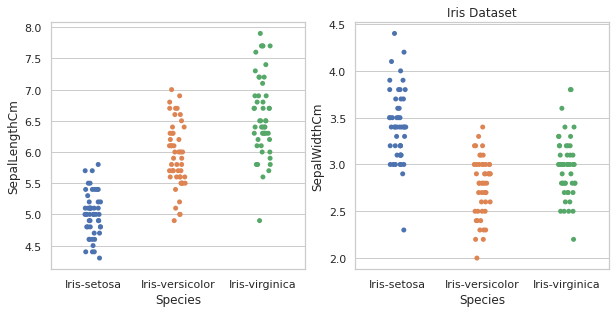

In [11]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
ax = sns.stripplot(x= 'Species',y = 'SepalLengthCm',data = iris)
plt.subplot(2,2,2)
ax = sns.stripplot(x= 'Species',y = 'SepalWidthCm',data = iris)
plt.title('Iris Dataset')
plt.show()

**BOX PLOT**

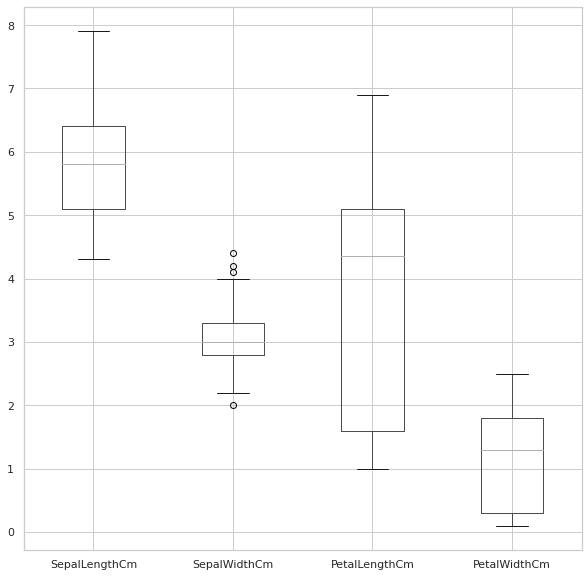

In [12]:
iris=iris.drop('Id',axis=1)
iris.boxplot(figsize=(10,10))
plt.show()

**COUNT PLOT**

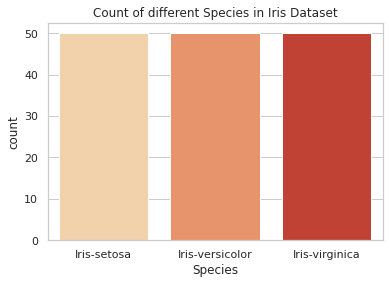

In [13]:
sns.countplot(x= 'Species',data = iris,palette = 'OrRd')
plt.title('Count of different Species in Iris Dataset')
plt.show()

**HEAT MAP**

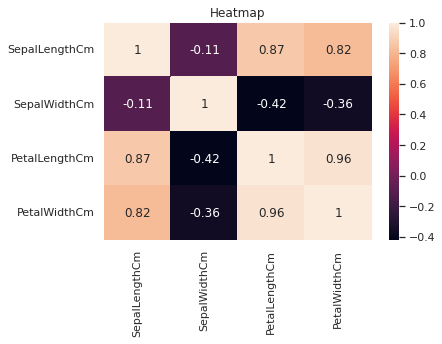

In [14]:
sns.heatmap(iris.corr(), annot = True)
plt.title('Heatmap')
plt.show()

**Finding the optimum number of clusters using k-means clustering**

In [15]:
x = iris.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss:",kmeans.inertia_)

k: 1 wcss: 680.8244
k: 2 wcss: 152.36870647733906
k: 3 wcss: 78.94084142614602
k: 4 wcss: 57.345409315718165
k: 5 wcss: 46.53558205128205
k: 6 wcss: 38.93873974358974
k: 7 wcss: 34.19068792479662
k: 8 wcss: 29.905374299825105
k: 9 wcss: 27.927882157034972
k: 10 wcss: 25.95549708624709


**Plotting the results using Elbow method**

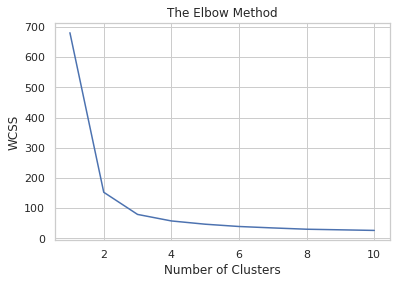

In [16]:
plt.plot(range(1,11),wcss)  
plt.title('The Elbow Method')  
plt.xlabel('Number of Clusters')  
plt.ylabel('WCSS')  
plt.show()

**Initializing K-Means with optimum number of clusters**

In [17]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(x)  #fiting K-Means to the dataset

**PREDICTING VALUES**

In [18]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

**Visualising Clusters**

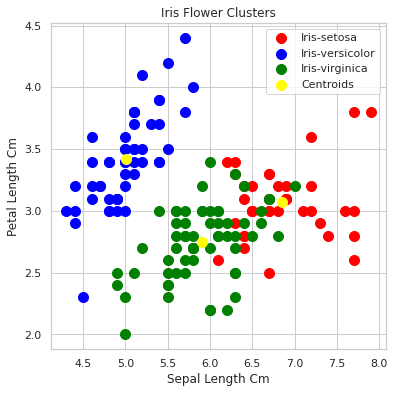

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Petal Length Cm')
plt.legend()
plt.show()